Problem Statement:

- In this project, a regression model is developed to predict the probability of being acepted for Graduate school
- The dataset contains the following parameters: GRE scores(out of 340), TOEFL Scores(out of 120), University Rating(out of 5), Statement of Purpose and Letter of Recommendation Strength(out of 5), Undergraduate GPA(out of 10), Research Experience(either 0 or 1), Chance of Admit(ranging from 0 to 1)

Step 0: Import Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
admission_df = pd.read_csv('Admission.csv')

In [102]:
admission_df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [103]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [104]:
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [105]:
admission_df = admission_df.drop(['Serial No.'], axis = 1)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [106]:
column_headers = admission_df.columns.values

In [107]:
column_headers

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Admission Chance'], dtype=object)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17804\3938587165.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(admission_df[column_header])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17804\3938587165.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(admission_df[column_header])
C:\Users\L

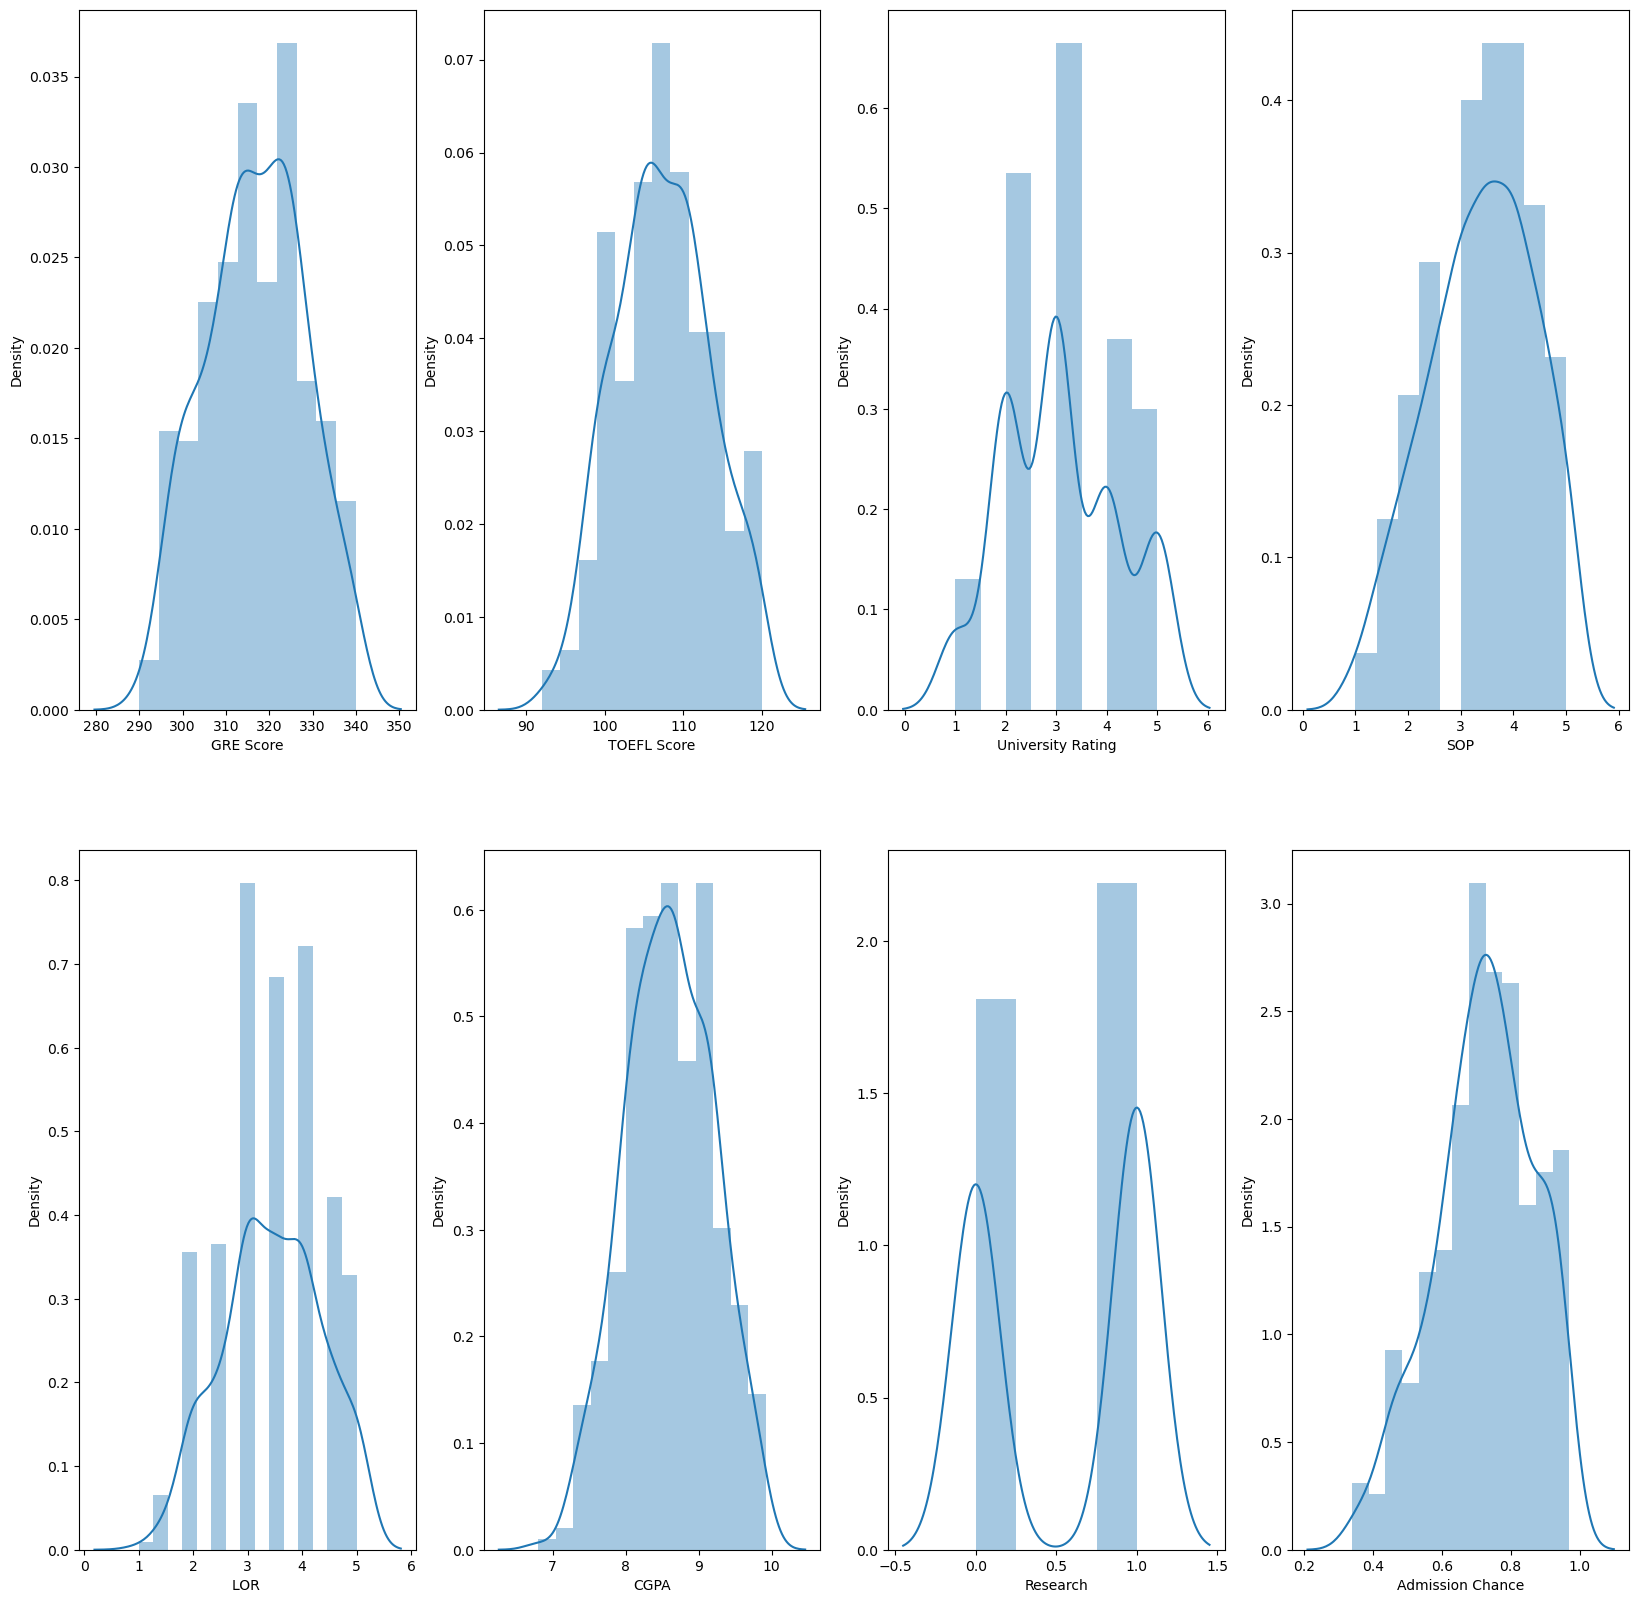

In [108]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 20))

for column_header in column_headers:
    plt.subplot(2, 4, i)
    sns.distplot(admission_df[column_header])
    i = i + 1


<Axes: >

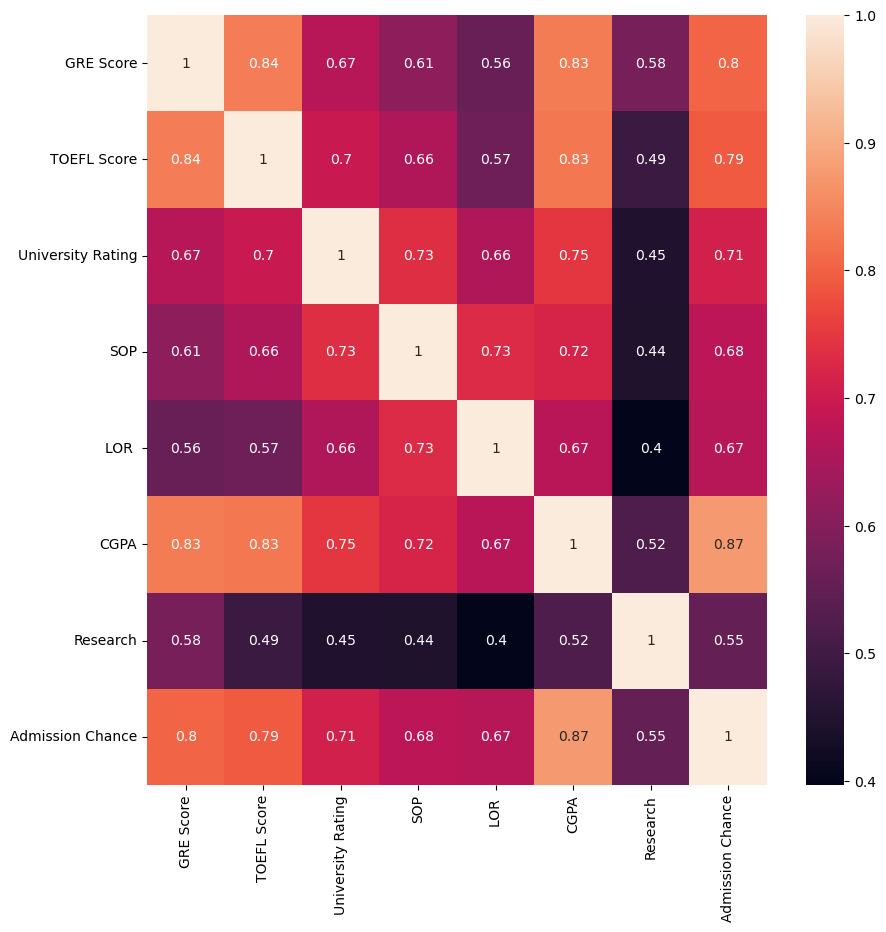

In [109]:
plt.figure(figsize = (10, 10))
sns.heatmap(admission_df.corr(), annot = True)

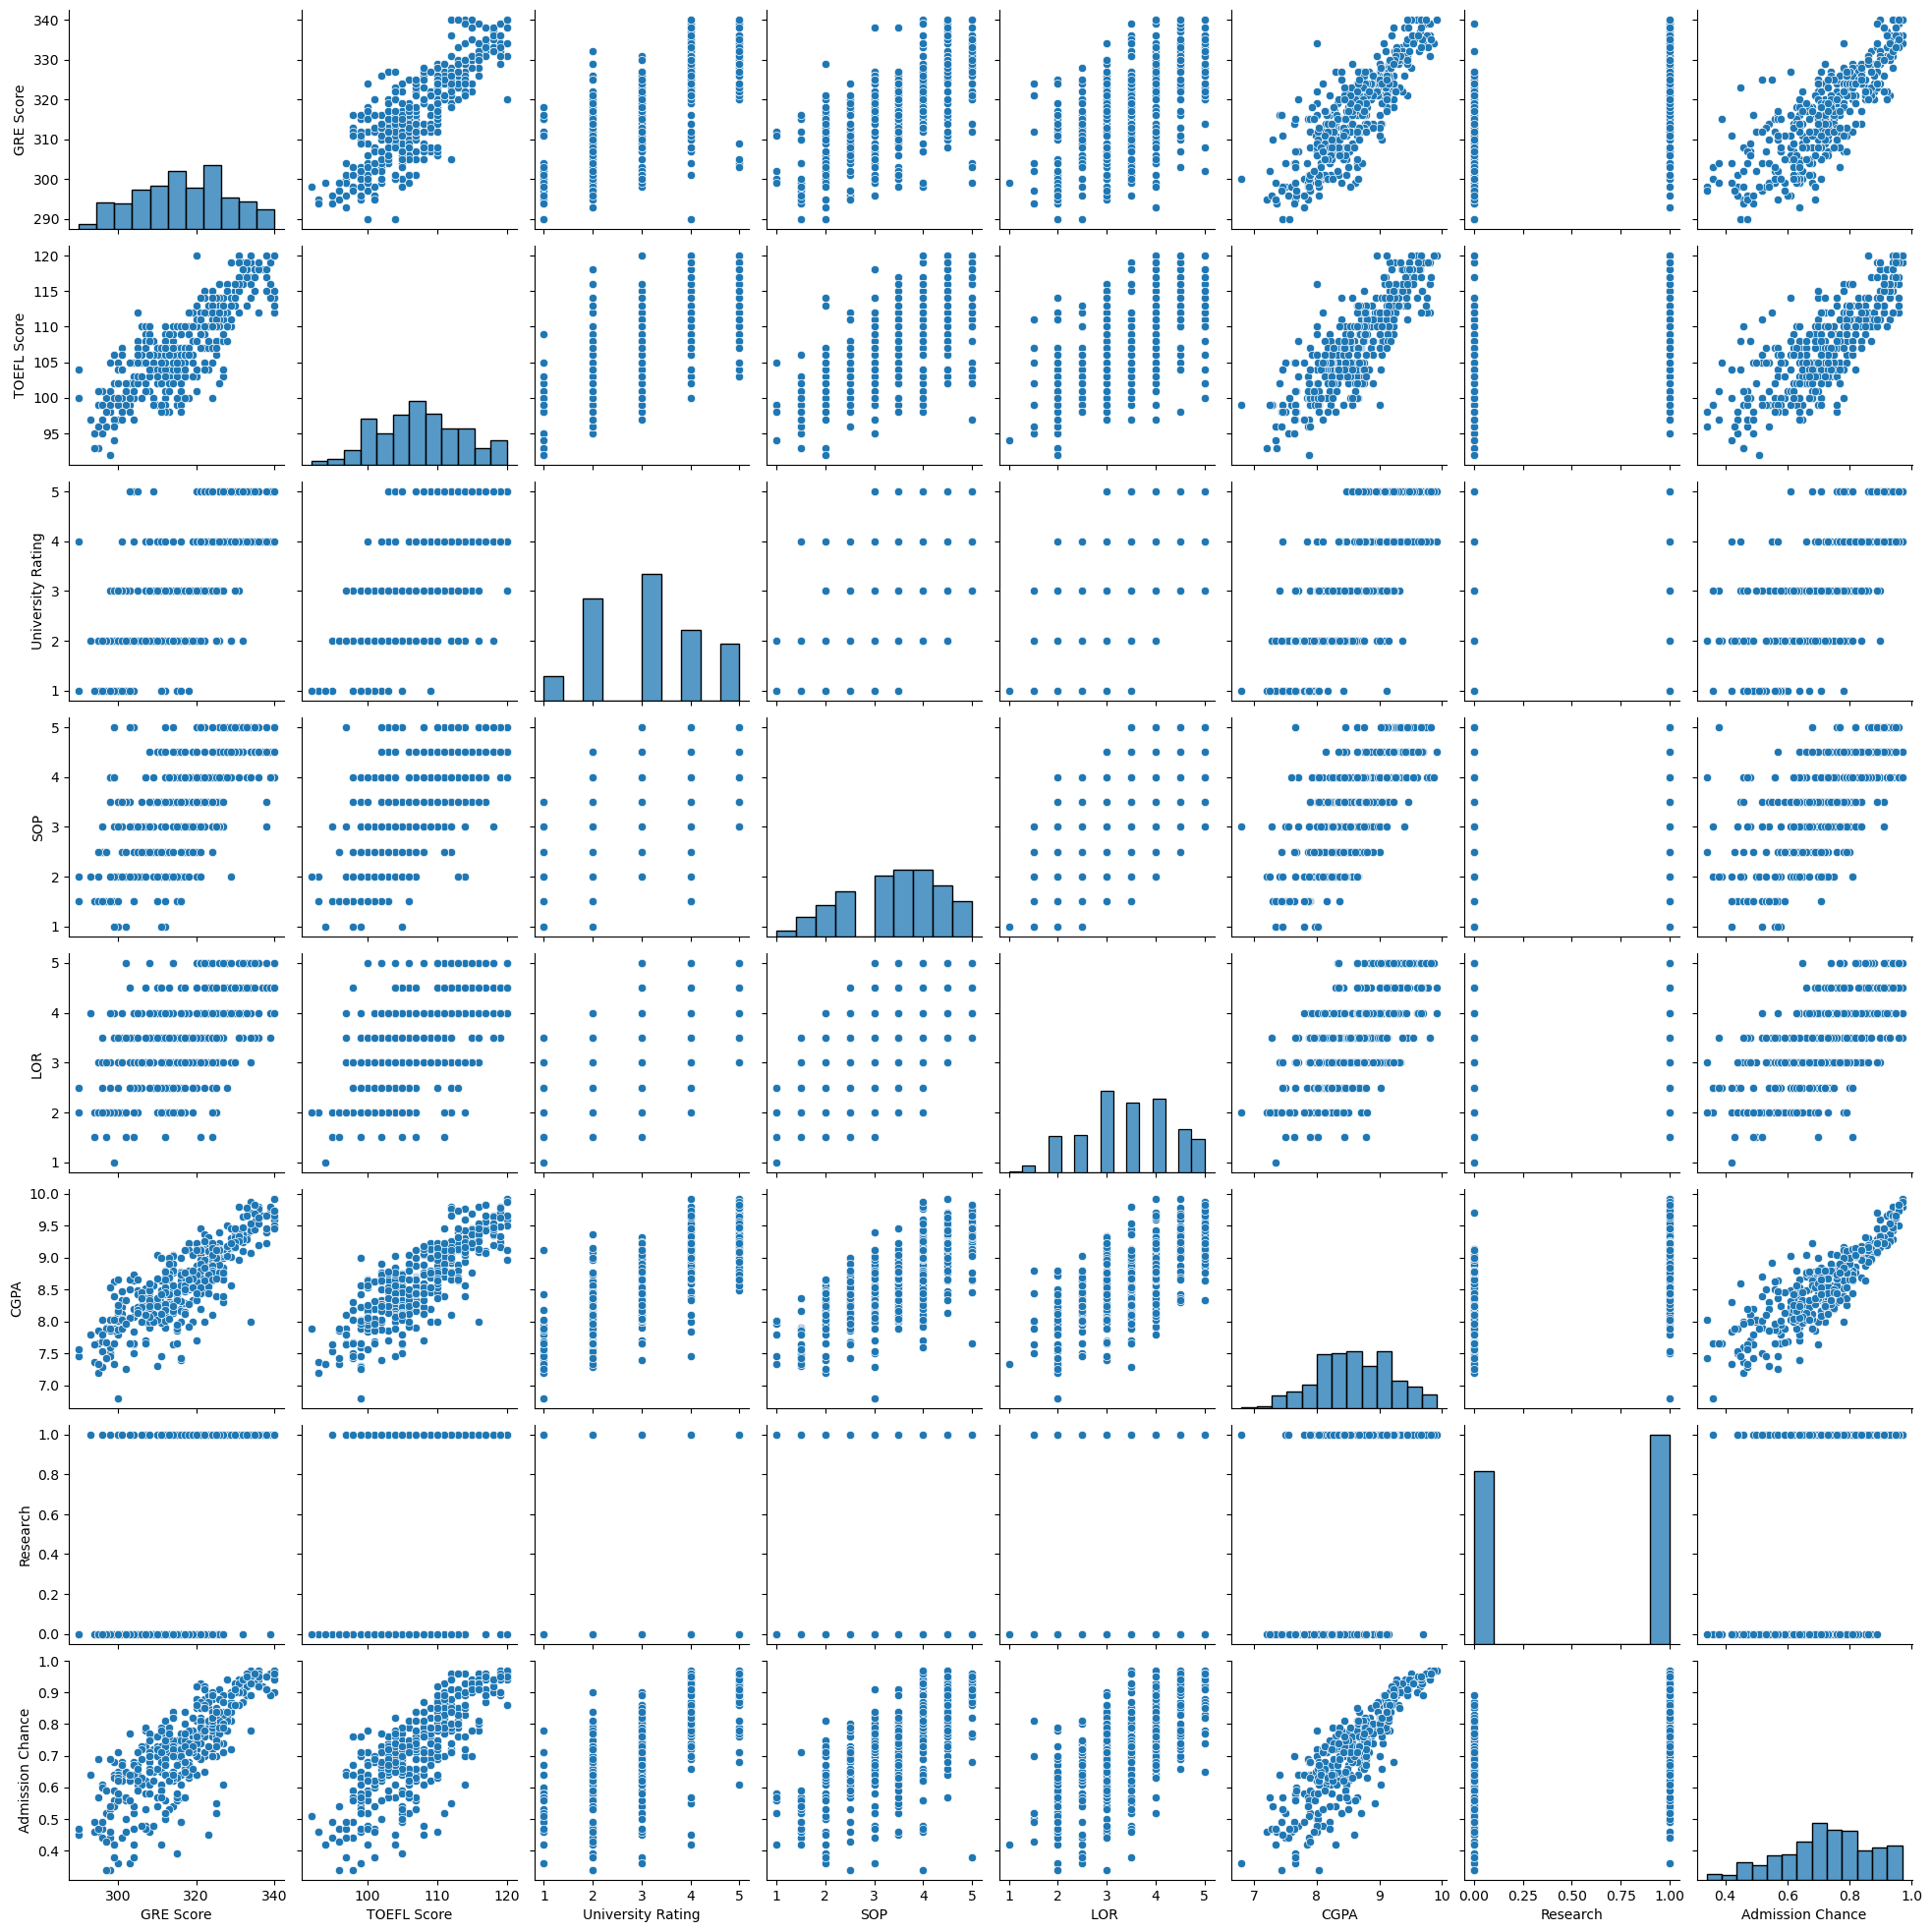

In [110]:
sns.pairplot(admission_df)

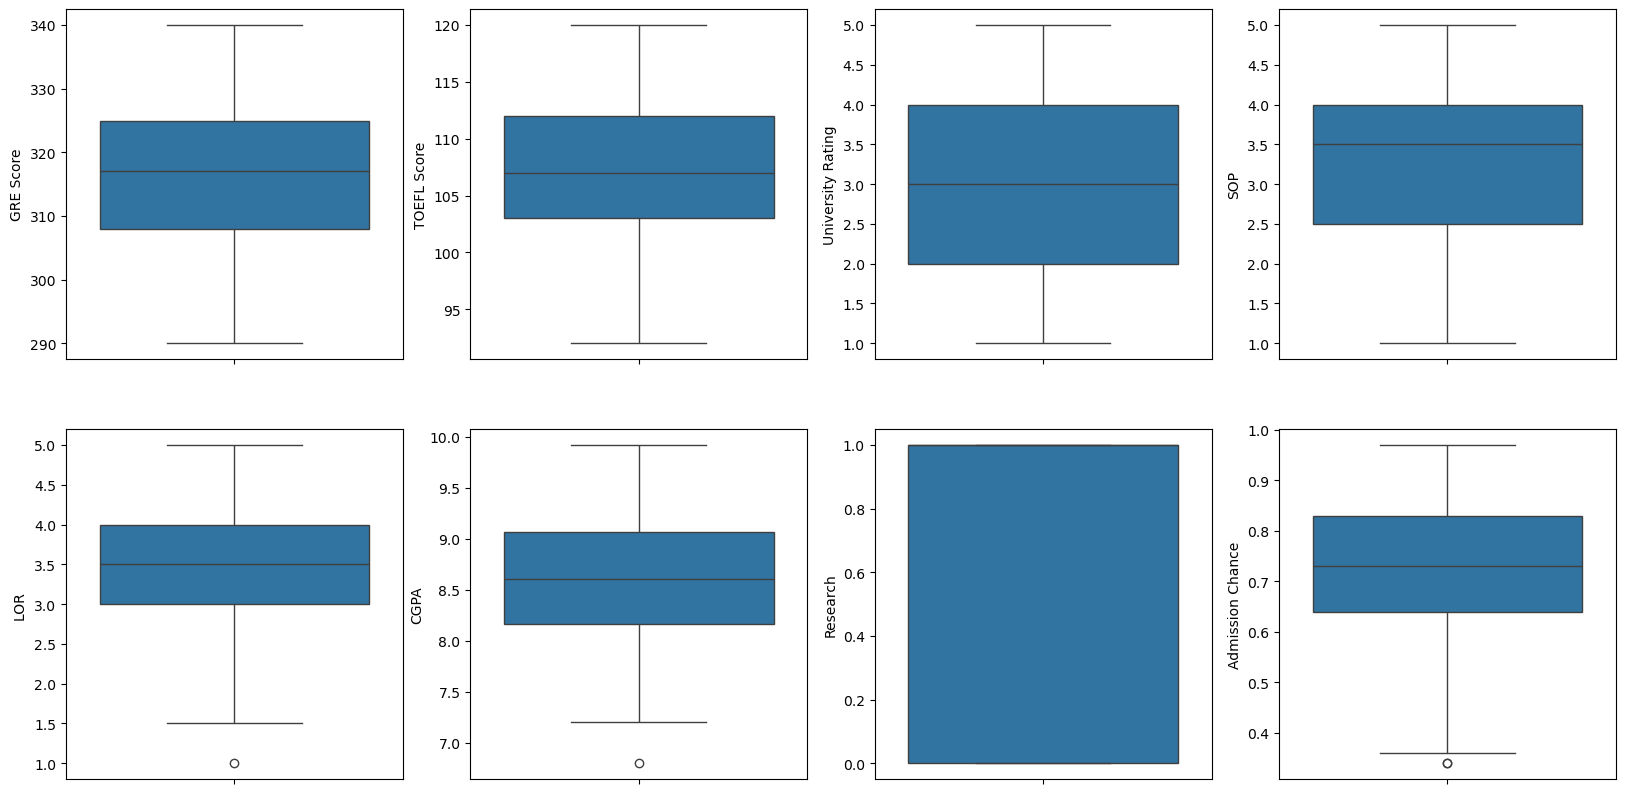

In [111]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 10))

for column_header in column_headers:
    plt.subplot(2, 4, i)
    sns.boxplot(admission_df[column_header])
    i = i + 1


Step 3: Create testing and training dataset/data cleaning

<Axes: >

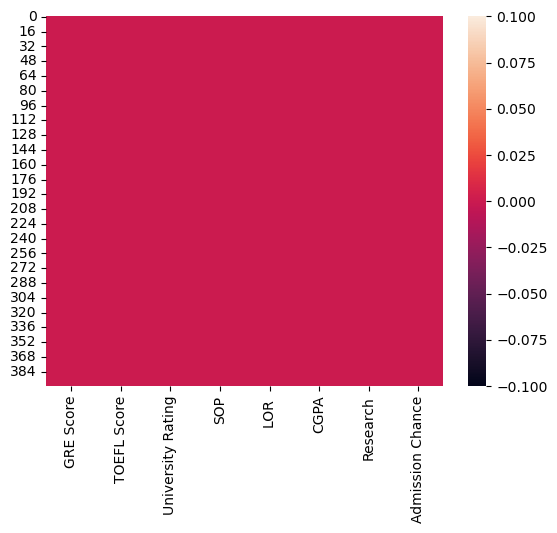

In [112]:
sns.heatmap(admission_df.isnull())

In [113]:
x = admission_df.drop(['Admission Chance'], axis = 1)

In [114]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [115]:
y = admission_df['Admission Chance']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Admission Chance, Length: 400, dtype: float64

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [117]:
x_train.shape

(320, 7)

Step 4 : Training the model

In [118]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(x_train, y_train)

LinearRegression()

In [119]:
print('Linear Model Coeff (m):', regressor.coef_)
print('Linear Model Coeff (b): ', regressor.intercept_)

Linear Model Coeff (m): [ 0.00161945  0.0028758   0.00373637 -0.00391943  0.02512243  0.12613505
  0.02546878]
Linear Model Coeff (b):  -1.2823139960689285


Step 5: Evaluating the model

Text(0.5, 0, 'True (ground truth)')

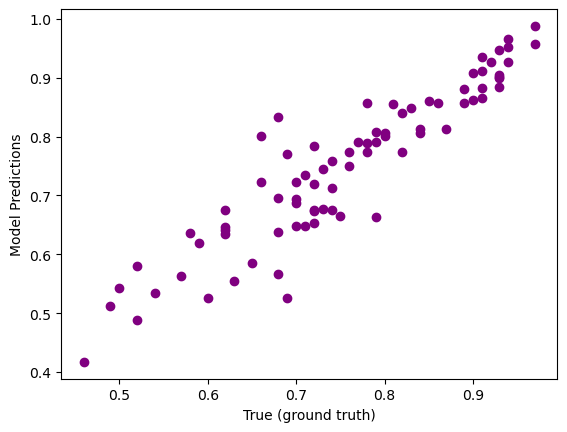

In [120]:
y_predict = regressor.predict(x_test)
plt.scatter(y_test, y_predict, color = 'purple')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

In [121]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = x_test.shape[1]
n = len(x_test)

In [122]:
k

7

In [123]:
n

80

In [124]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f')) 
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n -k - 1) 
MAPE = np.mean(np.abs((y_test - y_predict) / y_test)) * 100

print('RMSE =', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nR2', r2, '\nAdjusted R2 = ', adj_r2, '\nMAPE = ', MAPE)

RMSE = 0.051 
MSE =  0.0026206079540964005 
MAE =  0.03790195442066447 
R2 0.8377958691815276 
Adjusted R2 =  0.8220260231297316 
MAPE =  5.363854746010801


Step 6: Retrain and visualize the results

In [125]:
x = admission_df[['GRE Score', 'TOEFL Score']]
y = admission_df['Admission Chance']

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [127]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(x_train, y_train)

LinearRegression()

In [128]:
y_predict = regressor.predict(x_test)

Text(0.5, 0, 'True (ground truth)')

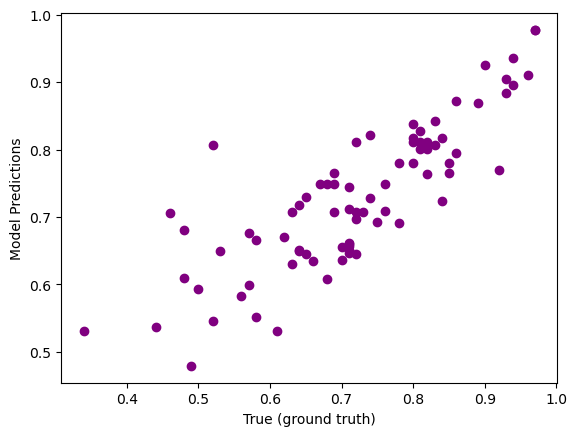

In [129]:
plt.scatter(y_test, y_predict, color = 'purple')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

In [130]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = x_test.shape[1]
n = len(x_test)

In [131]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f')) 
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n -k - 1) 
MAPE = np.mean(np.abs((y_test - y_predict) / y_test)) * 100

print('RMSE =', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nR2', r2, '\nAdjusted R2 = ', adj_r2, '\nMAPE = ', MAPE)

RMSE = 0.077 
MSE =  0.00588125182539998 
MAE =  0.054862706599698684 
R2 0.6864576077942428 
Adjusted R2 =  0.6783136495551323 
MAPE =  8.938811024762424


In [132]:
from mpl_toolkits.mplot3d import Axes3D
x_surf, y_surf = np.meshgrid(np.linspace(admission_df['GRE Score'].min(), admission_df['GRE Score'].max(), 100), np.linspace(admission_df['TOEFL Score'].min(), admission_df['TOEFL Score'].max(), 100))
only_x = pd.DataFrame({'GRE Score': x_surf.ravel(), 'TOEFL Score': y_surf.ravel()})
fitted_y = regressor.predict(only_x)
fitted_y = fitted_y.reshape(x_surf.shape)

Text(0.5, 0, 'Acceptance Chance')

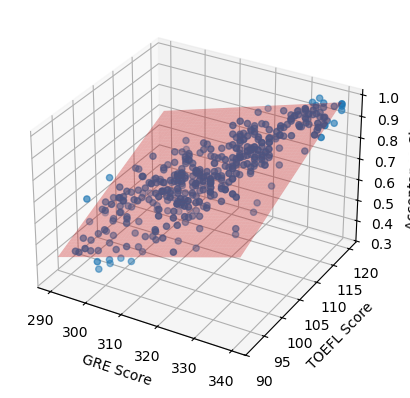

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(admission_df['GRE Score'], admission_df['TOEFL Score'], admission_df['Admission Chance'])
ax.plot_surface(x_surf, y_surf, fitted_y, color = 'r', alpha = 0.3) # alpha pentru transparenta
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Acceptance Chance')